In [124]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the CSV dataset
df = pd.read_csv('winn.csv')


In [125]:
#select number of cows
#show name of cows
names_of_cows = []
cow_group_by_winner = df.groupby('winner')
for cow_num in cow_group_by_winner:
  names_of_cows.append(cow_num[0])

print(names_of_cows)

[4008, 4026, 4035, 5064, 5087, 5118, 6025, 6029, 6046, 6053, 6062, 6068, 6086, 6088, 6092, 6094, 6095, 6096, 7045, 7060, 7064, 7109, 7114, 7116, 7128, 7136, 7138, 7153, 7163, 8083]


In [130]:
#create graph for 4 expert and all of them
G_NV = nx.DiGraph()
G_WS = nx.DiGraph()
G_DW = nx.DiGraph()
G_SB = nx.DiGraph()
G_ALL = nx.DiGraph()

#extract connectivity for each


for index,row in df.iterrows():
  if row.T.expert == "NV":
    G_NV.add_edge(row.T.winner,row.T.loser)
  if row.T.expert == "WS":
    G_WS.add_edge(row.T.winner,row.T.loser)
  if row.T.expert == "DW":
    G_DW.add_edge(row.T.winner,row.T.loser)
  if row.T.expert == "SB":
    G_SB.add_edge(row.T.winner,row.T.loser)


  G_ALL.add_edge(row.T.winner,row.T.loser)




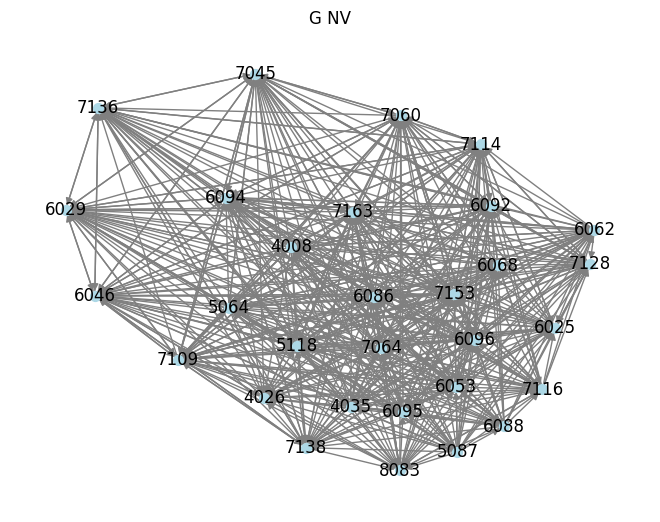

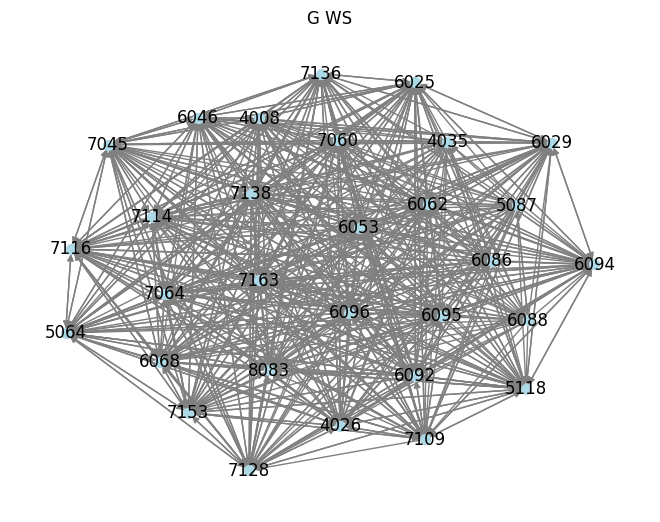

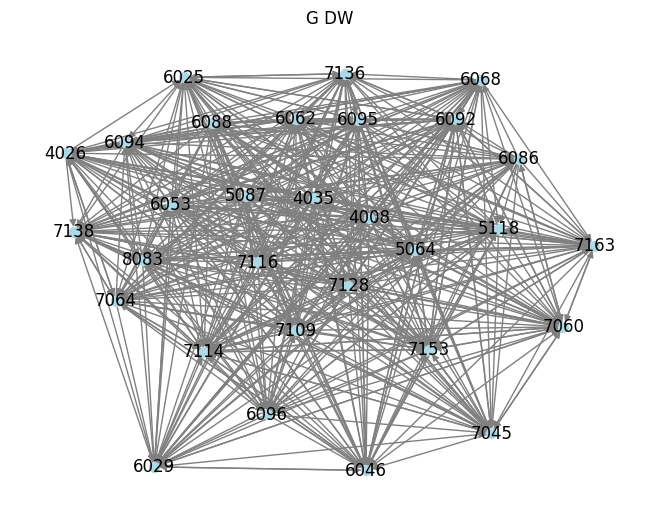

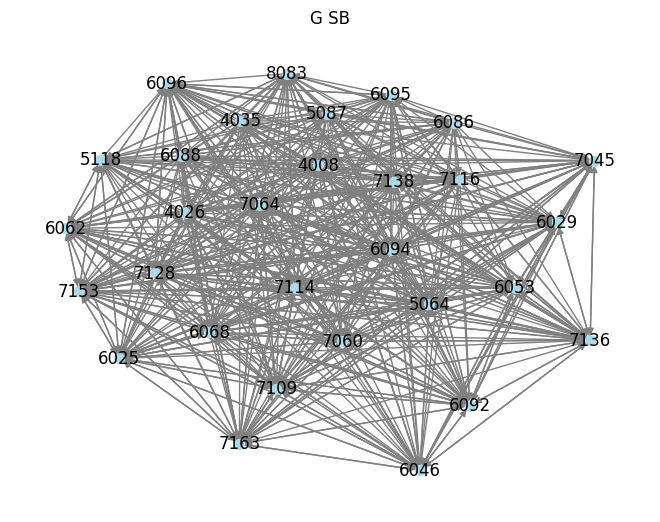

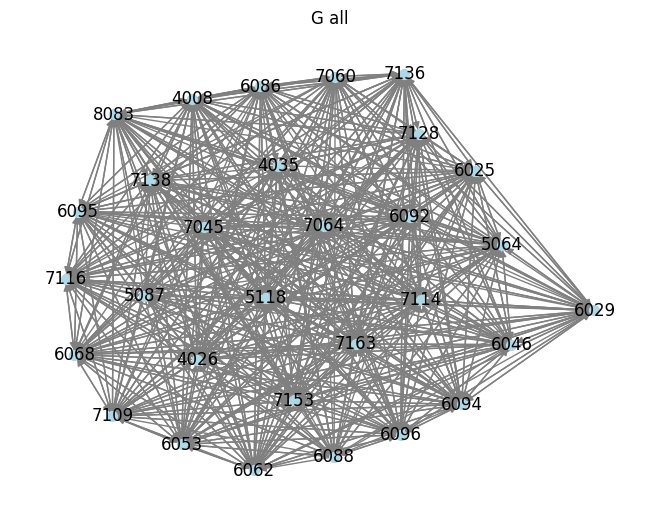

In [131]:
def draw_graphs(G,title):
  # draw graph
  pos = nx.spring_layout(G)  # select position of node in graph
  nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=50, edge_color='gray', arrowsize=10)

  # show graph
  plt.title(title)
  plt.show()

draw_graphs(G_NV,"G NV")
draw_graphs(G_WS,"G WS")
draw_graphs(G_DW,"G DW")
draw_graphs(G_SB,"G SB")
draw_graphs(G_ALL, "G all")

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(0)  # Setting the seed to 0

def calculate_degrees(G,name):
  #find how many connection into each node
  degrees = []
  for x in names_of_cows:
    degree = G.degree[x]
    degrees.append([degree,x])

  #lower degree means lower lose count
  sorted_degrees = sorted(degrees, key=lambda x: x[0])
  print(name,":",sorted_degrees)
  #extract degree for kmeans
  array_1d = [subarray[0] for subarray in sorted_degrees]

  print(array_1d)
  # Convert data to numpy array
  X = np.array(array_1d).reshape(-1, 1)


  # Create a K-means clustering model with 3 clusters
  kmeans = KMeans(n_clusters=3)

  # Fit the model to the data
  kmeans.fit(X)

  # Get the cluster labels for the second index of the data
  labels = kmeans.labels_

  print(labels)


  score_name = ["Most Lame Cow","Healthiest Cow","In-between Cows"]
  #show results
  for index in range(len(labels)):
    print(f"{index}. cow {sorted_degrees[index][1]} --> {score_name[labels[index]]}")
  return labels



data_NV = calculate_degrees(G_NV,"G NV")
data_WS = calculate_degrees(G_WS,"G WS")
data_DW = calculate_degrees(G_DW,"G DW")
data_SB = calculate_degrees(G_SB,"G SB")
data_ALL= calculate_degrees(G_ALL,"G ALL")

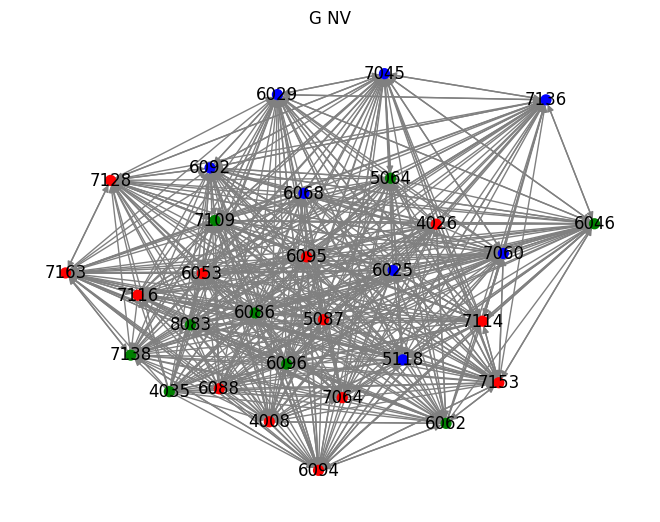

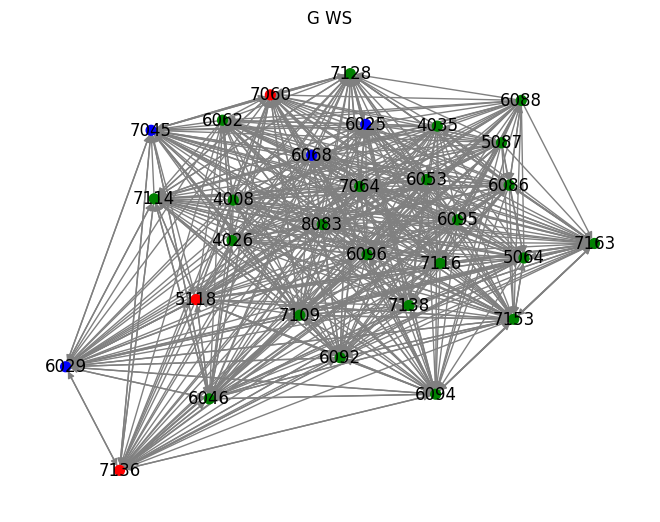

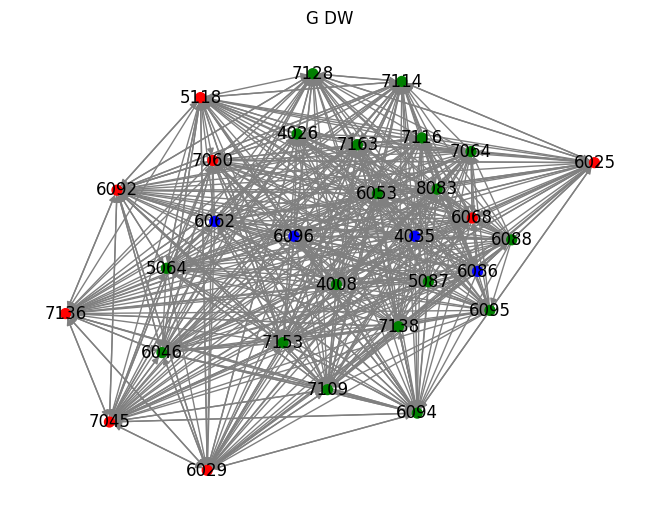

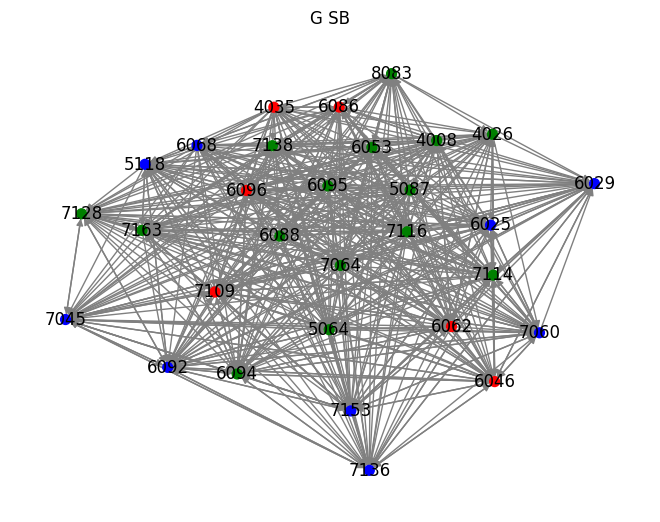

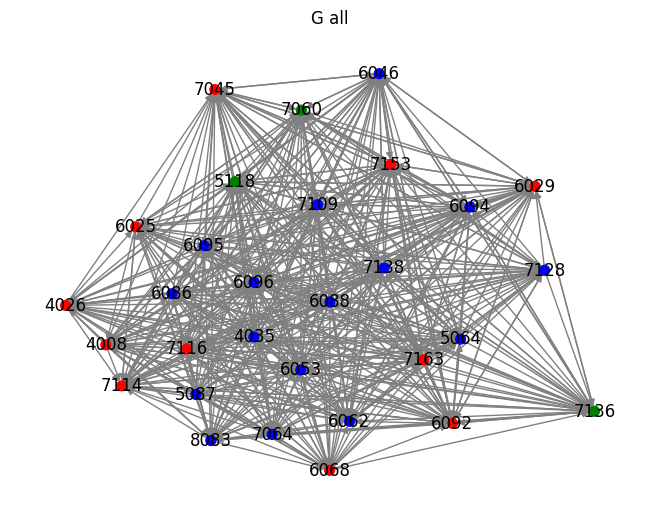

In [138]:
def draw_colorized(G,labels,name):
  # Define node colors
  node_colors = []

  #set color for node with its score

  #red for Most Lame Cow
  #green for "Healthiest Cow"
  #blue for "In-between Cows"
  color_score = ['red','green','blue']
  for index in range(len(labels)):
    node_colors.append(
        color_score[labels[index]]
    )

  pos = nx.spring_layout(G)  # select position of node in graph
  # Draw the graph with specified node colors
  nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=50, edge_color='gray', arrowsize=10)
  # Show the graph
  plt.title(name)
  plt.show()

draw_colorized(G_NV,data_NV,"G NV")
draw_colorized(G_NV,data_WS,"G WS")
draw_colorized(G_NV,data_DW,"G DW")
draw_colorized(G_NV,data_SB,"G SB")
draw_colorized(G_NV,data_ALL,"G all")